<a href="https://colab.research.google.com/github/Victor0vich/Denis/blob/main/Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

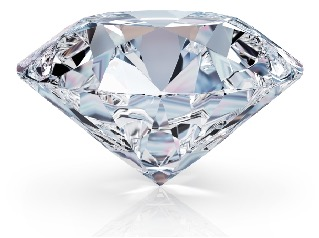

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

[Еще одна интересная статья](https://www.alltime.ru/blog/?page=post&blog=watchblog&post_id=chistota-i-tsvet-brilliantov-vse-o-luchshikh-druzyakh-devushek)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* вспомнить библиотеки pandas, numpy и matplotlib, seaborn

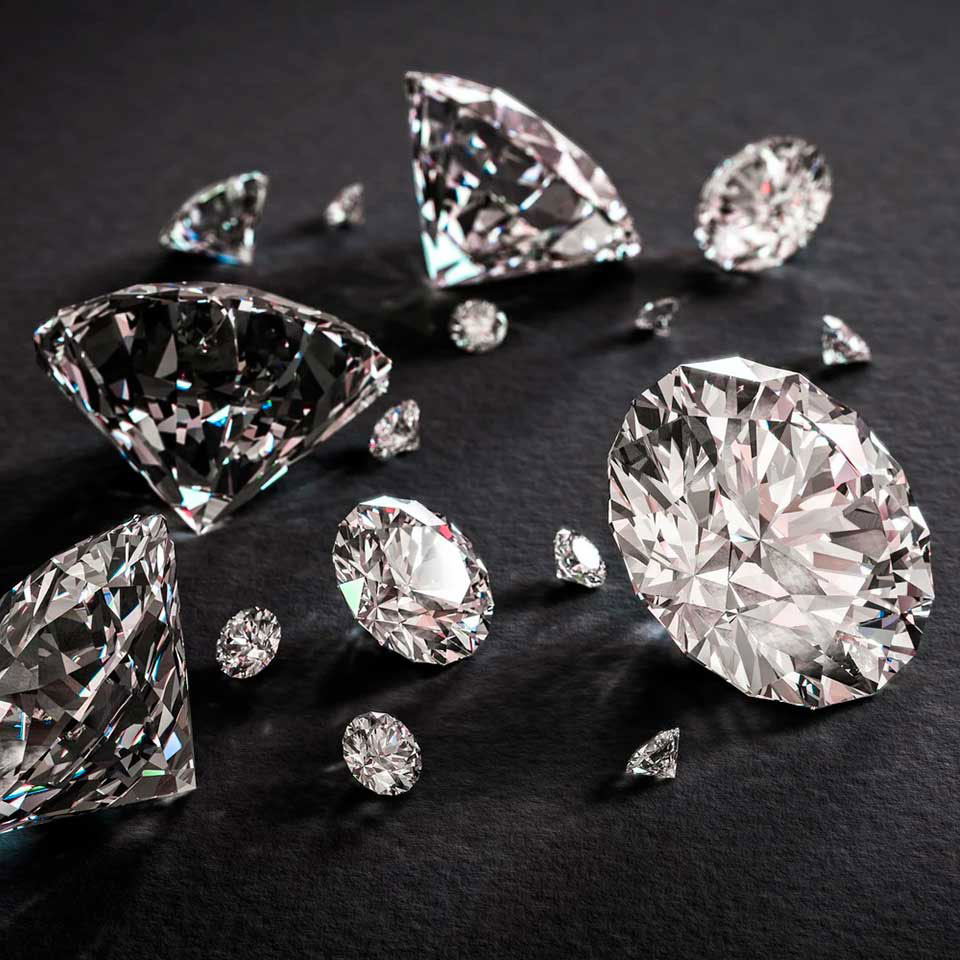

## Немного о расшифровке характеристик алмаза/бриллианта в быту

**1 карат = 0,2 грамм**

Расшифровываем характеристики камня по бирке. Например, на бирке вы можете увидеть следующее:

**1Бр Кр57 - 0,31 1/3А.**

Разберем, что этот хитрый шифр означает:

* первое обозначение указывает на количество и вид вставок: 1Бр – 1 бриллиант;

* на втором месте стоит обозначение технологии обработки камня: Кр57 – это круглая огранка с 57 гранями;

* далее идет вес вставки в каратах: наш бриллиант весит 0,31 карата;

* затем стоит характеристика красоты камня: 1/3 – первая цифра обозначает группу цвета, вторая – группу чистоты;

* в конце идет группа качества огранки [А].

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DIAMONDS_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_good.csv"

In [ ]:
df = pd.read_csv(DIAMONDS_DATASET)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [ ]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
5,NaN,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337.0,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39


In [ ]:
df.tail()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757.0,5.83,5.87,3.64


In [ ]:
df.sample(3)

,carat,cut,color,clarity,depth,table,price,'x','y','z'
16115,0.90,Premium,D,VS1,61.2,58.0,6441.0,6.27,6.25,3.83
43912,0.30,Good,H,VS1,63.2,59.0,512.0,4.31,4.27,2.71
16421,1.27,Very Good,I,SI1,60.7,61.0,6559.0,6.97,6.91,4.21


## Исследование данных

Размер датасета

In [ ]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53442 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    52950 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53935 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


Основные числовые характеристики

In [ ]:
df.describe()

,carat,depth,table,price,'x','y','z'
count,53442.000000,52950.000000,53940.000000,53940.000000,53940.000000,53935.000000,53940.000000
mean,0.797561,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
std,0.473534,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,6,7,8
top,Ideal,G,SI1
freq,21524,11292,13065


In [ ]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,'x','y','z'
count,53442.000000,53940,53940,53940,52950.000000,53940.000000,53940.000000,53940.000000,53935.000000,53940.000000
unique,NaN,6,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21524,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797561,NaN,NaN,NaN,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
std,0.473534,NaN,NaN,NaN,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [ ]:
df.duplicated().sum()

135

In [ ]:
# df[условие фильтрации]

In [ ]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,'x','y','z'
1005,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105.0,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919.0,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093.0,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130.0,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203.0,5.19,5.17,3.17


In [ ]:
# df = df.drop_duplicates()

df.drop_duplicates(inplace=True)

df.shape

(53805, 10)

In [ ]:
df.loc[0]

,0
carat,0.23
cut,Ideal
color,E
clarity,SI2
depth,61.5
table,55.0
price,326.0
'x',3.95
'y',3.98
'z',2.43


In [ ]:
df.reset_index(inplace=True, drop=True)

df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [ ]:
df.isnull().mean() * 100

,0
carat,0.925565
cut,0.000000
color,0.000000
clarity,0.000000
depth,1.839978
table,0.000000
price,0.000000
'x',0.000000
'y',0.009293
'z',0.000000


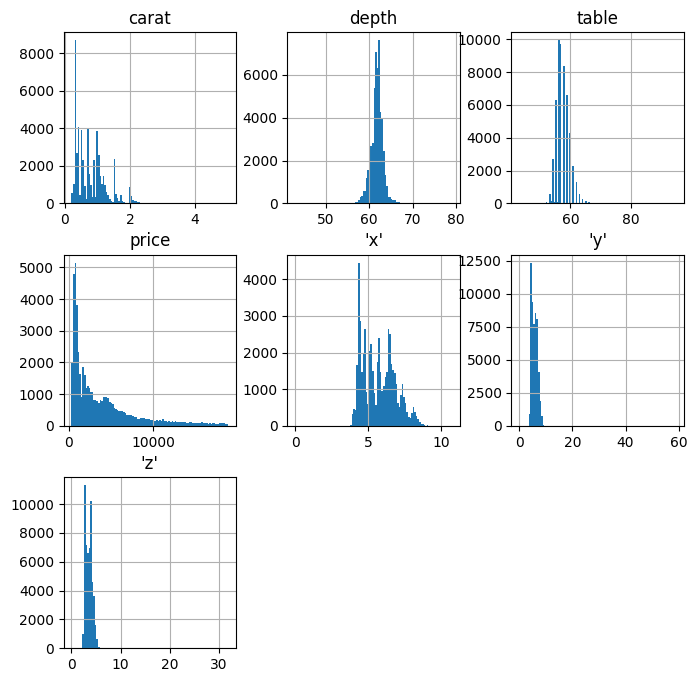

In [ ]:
df.hist(bins=100, figsize=(8,8));

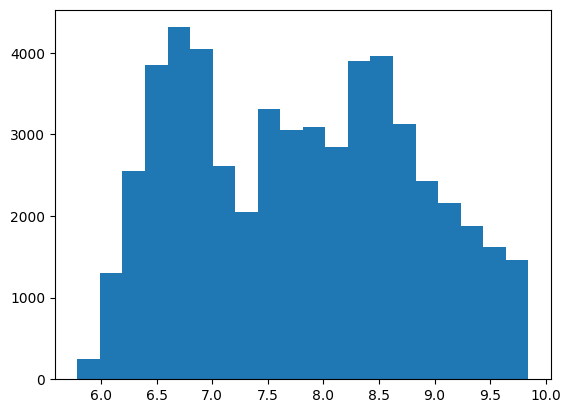

In [ ]:
plt.hist(np.log(df['price']), bins=20);

In [ ]:
median_carat = df['carat'].median()

df['carat'].fillna(median_carat, inplace=True)

/tmp/ipython-input-24-151408684.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['carat'].fillna(median_carat, inplace=True)


In [ ]:
median_depth = df['depth'].median()

df['depth'].fillna(median_depth, inplace=True)

### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53805 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53805 non-null  float64
 1   cut      53805 non-null  object 
 2   color    53805 non-null  object 
 3   clarity  53805 non-null  object 
 4   depth    52815 non-null  float64
 5   table    53805 non-null  float64
 6   price    53805 non-null  float64
 7   'x'      53805 non-null  float64
 8   'y'      53800 non-null  float64
 9   'z'      53805 non-null  float64
dtypes: float64(7), object(3)
memory usage: 6.5+ MB


In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

In [ ]:
# ваш код здесь

median_y = df["'y'"].median()

df["'y'"].fillna(median_y, inplace=True)

## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

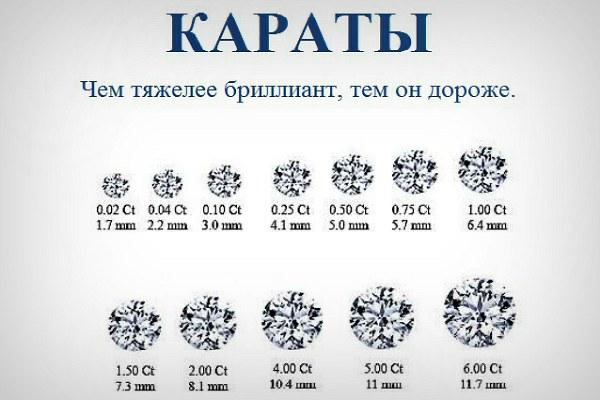

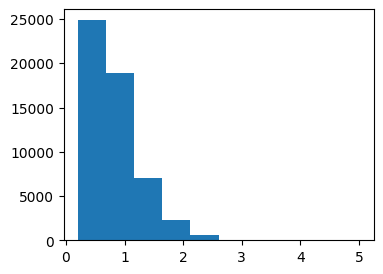

In [ ]:
plt.figure(figsize=(4,3))

plt.hist(df.carat);

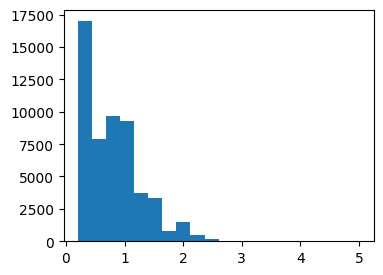

In [ ]:
plt.figure(figsize=(4,3))

plt.hist(df.carat, bins=20);

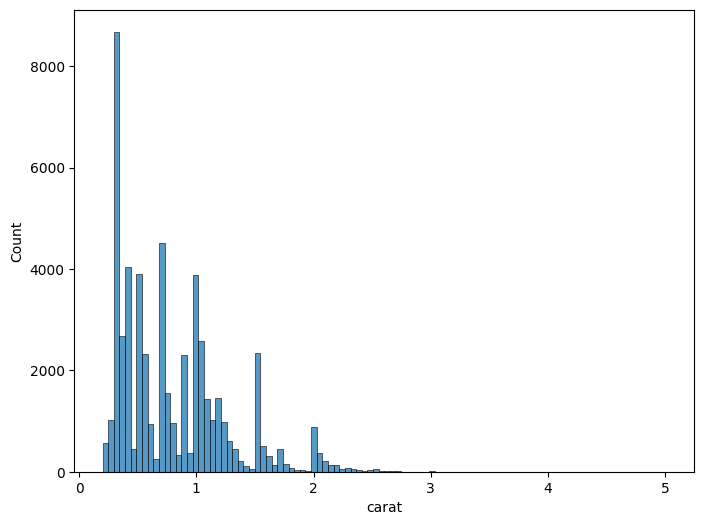

In [ ]:
plt.figure(figsize=(8,6))

sns.histplot(df.carat, bins=100);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [ ]:
df.carat.min(), df.carat.max()

(0.2, 5.01)

Сколько мелких бриллиантов в датасете?

In [ ]:
len(df[df.carat < 0.3])

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [ ]:
100 * len(df[df.carat >= 1]) / len(df)

35.00046464083264

Посмотрим как число карат влияет на стоимость алмаза

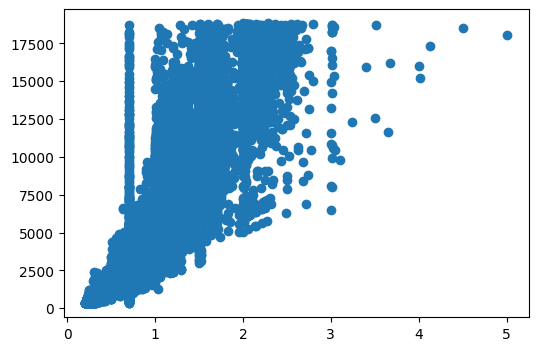

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df.carat, df.price);

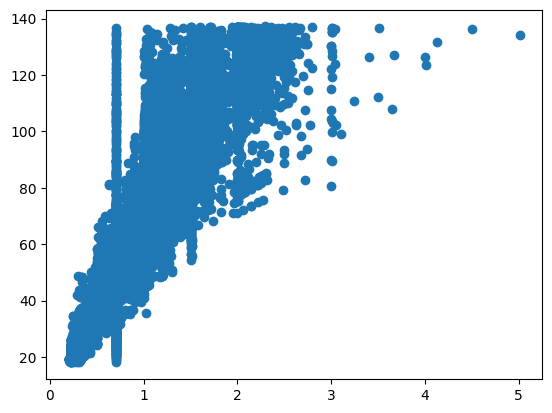

In [ ]:
plt.scatter(df.carat, np.sqrt(df.price));

In [ ]:
np.corrcoef(df.carat, df.price)[0][1]

0.9164989435440223

### Cut (огранка алмаза)

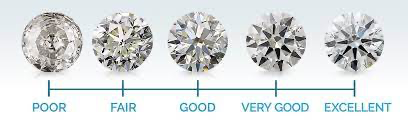

In [ ]:
df['cut'].value_counts(normalize=True) * 100

,proportion
cut,
Ideal,39.894062
Premium,25.508782
Very Good,22.401264
Good,9.077223
Fair,2.969984
Goood,0.148685


In [ ]:
df['cut'] = df['cut'].replace('Goood', 'Good')

<Axes: >

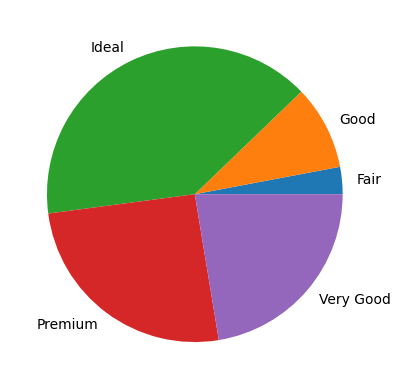

In [ ]:
df.groupby('cut').size().plot(kind='pie')

Посмотрим как влияет огранка алмаза на его стоимость

<ipython-input-24-4bc178012683>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='price', data = df, palette='summer')


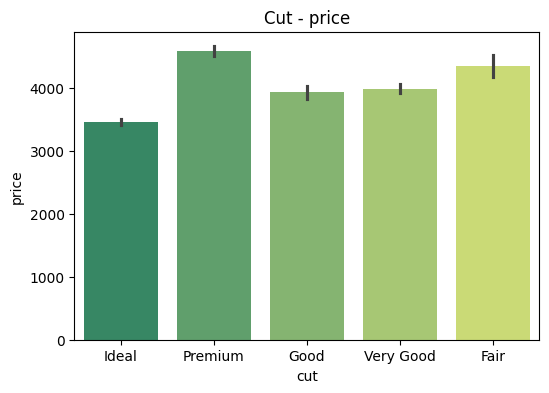

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='cut', y='price', data = df, palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [ ]:
# ваш код здесь

df[df.cut == 'Fair']['carat'].max()

5.01

Посчитаем среднюю стоимость алмазов в каждой категории

In [ ]:
df.groupby(['cut', 'carat'])['price'].mean()

cut        carat
Fair       0.22       337.000000
           0.23       369.000000
           0.25       645.666667
           0.27       371.000000
           0.29      1184.000000
                        ...     
Very Good  2.70     14341.000000
           2.74     17174.000000
           3.00      6512.000000
           3.04     15354.000000
           4.00     15984.000000
Name: price, Length: 1141, dtype: float64

In [ ]:
df.groupby('cut')['carat'].mean()

cut
Fair         1.040094
Good         0.845796
Ideal        0.703331
Premium      0.889616
Very Good    0.804177
Name: carat, dtype: float64

Посчитаем несколько характеристик в зависимости от огранки

In [ ]:
df.groupby('cut')['carat'].agg(['max', 'min', 'mean'])

,max,min,mean
cut,,,
Fair,5.01,0.22,1.040094
Good,3.01,0.23,0.846198
Goood,2.01,0.30,0.821250
Ideal,3.50,0.20,0.703331
Premium,4.01,0.20,0.889616
Very Good,4.00,0.20,0.804177


In [ ]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean'))

,PriceMean,PriceMedian,CaratMean
cut,,,
Fair,4347.735294,3282.0,1.040094
Good,3920.705160,3044.0,0.846198
Goood,4265.775000,2604.5,0.821250
Ideal,3462.593850,1813.0,0.703331
Premium,4581.864918,3175.0,0.889616
Very Good,3982.162781,2649.0,0.804177


In [ ]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean')).sort_values(by='PriceMean', ascending=False)

,PriceMean,PriceMedian,CaratMean
cut,,,
Premium,4581.864918,3175.0,0.889616
Fair,4347.735294,3282.0,1.040094
Very Good,3982.162781,2649.0,0.804177
Good,3926.266317,3029.5,0.845796
Ideal,3462.593850,1813.0,0.703331


## Table and Depth

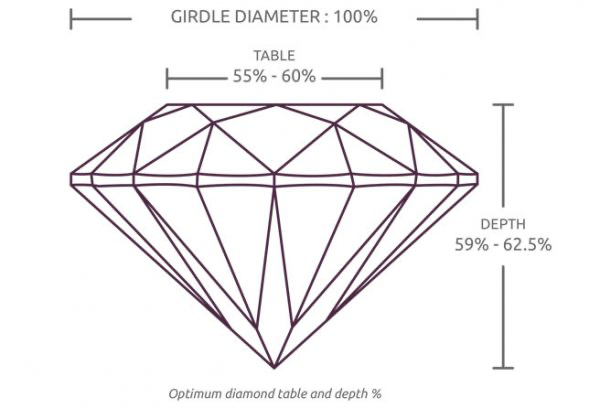

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [ ]:
len(df[(df.table >= 55) & (df.table <= 60)]) / len(df)

0.8439364371340954

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [ ]:
# ваш код здесь

len(df[(df.table >= 55) & (df.table <= 60) & (df.depth >= 59) & (df.depth <= 62.5)]) / len(df)

0.6206300529690549

### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [ ]:
# ваш код здесь

df['price'].median()

2401.0

In [ ]:
df[(df.table >= 55) & (df.table <= 60) & (df.depth >= 59) & (df.depth <= 62.5)]['price'].median()

2215.0

Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [ ]:
np.corrcoef(df.table, df.price)[0][1]

np.float64(0.12662153885758198)

In [ ]:
np.corrcoef(df.depth, df.price)[0][1]

-0.010831614226837228

## Clarity - прозрачность алмаза

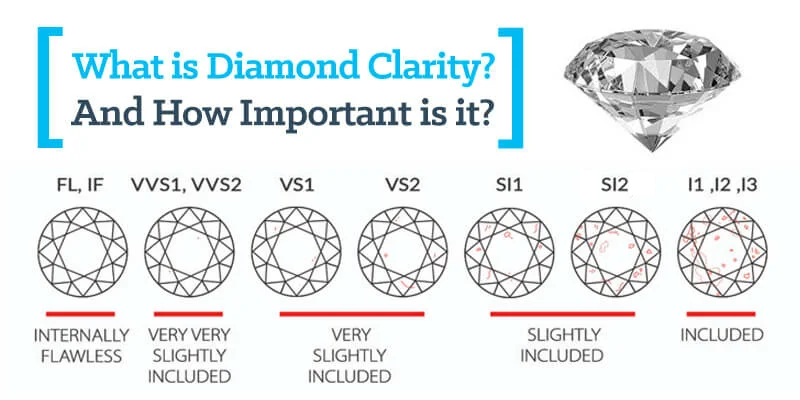

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [ ]:
# ваш код здесь

df['clarity'].value_counts()

clarity
SI1     13035
VS2     12231
SI2      9154
VS1      8157
VVS2     5056
VVS1     3648
IF       1784
I1        740
Name: count, dtype: int64

### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [ ]:
# ваш код здесь

len(df[df.clarity.isin(['VVS1','VVS2'])])

8704

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

<ipython-input-35-9f520fe39633>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='clarity', y='price', data = df, palette='summer')


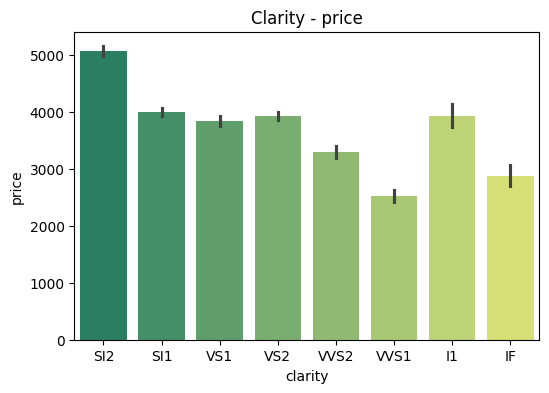

In [ ]:
# ваш код здесь

plt.figure(figsize=(6,4))

sns.barplot(x='clarity', y='price', data = df, palette='summer')
plt.title('Clarity - price')
plt.show();

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [ ]:
# ваш код здесь

df.groupby(['cut', 'clarity'])['price'].mean().sort_values(ascending=False)

cut        clarity
Premium    SI2        5556.262491
Fair       SI2        5145.740175
Very Good  SI2        4988.709447
Ideal      SI2        4761.711917
Good       SI2        4544.119816
Premium    VS2        4539.441053
           VS1        4491.247730
           SI1        4451.865244
Very Good  IF         4373.299625
Ideal      I1         4335.726027
Good       VS2        4280.315631
Very Good  VS2        4217.842758
Fair       SI1        4201.818182
           VS2        4189.217054
           VS1        4165.141176
Good       IF         4141.931507
Very Good  I1         4078.226190
Premium    I1         3947.331707
Very Good  SI1        3936.972136
Fair       VVS1       3871.352941
Premium    IF         3856.143478
Very Good  VS1        3805.480813
Good       VS1        3799.741248
Premium    VVS2       3784.643599
Ideal      SI1        3755.110434
Fair       I1         3703.533333
Good       SI1        3688.387015
           I1         3601.810526
Ideal      VS1        3490.98

# Домашнее задание

## 1) x, y, z

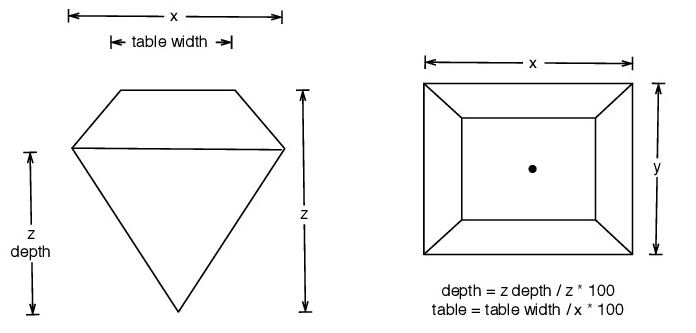

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

Переименуем колонки

In [ ]:
df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [ ]:
# ваш код здесь
...

Для каждого из этих столбцов вычислите минимальное значение.

In [ ]:
np.min(df['x']), np.min(df['y']), np.min(df['z'])

(0.0, 0.0, 0.0)

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [ ]:
# ваш код здесь
...

### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [ ]:
# ваш код здесь
...

### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [ ]:
# ваш код здесь
...

### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

In [ ]:
# ваш код здесь
...

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [ ]:
# ваш код здесь
...

### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [ ]:
# ваш код здесь
...

## 2) Color

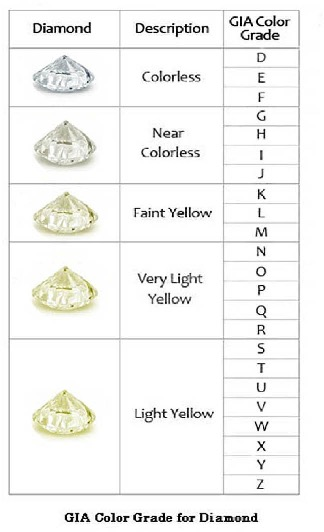

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [ ]:
# ваш код здесь
...

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

In [ ]:
# ваш код здесь
...

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [ ]:
# ваш код здесь
...

### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [ ]:
# ваш код здесь
...